# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

При выгрузке файла был обнаружен склеенный в одном столбце датафрейм. Добавление разделителя "\t" помогло привести таблицу в удобоваримый вид. При вызове информации о датафрейме на первый взгляд можно сказать, что типы данных на своём месте, а вот с количеством пропущенных значений придётся повозиться. 

### Шаг 2. Предобработка данных

In [2]:
data = data.drop(['total_images', 'is_apartment', 'open_plan', 'balcony', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis='columns')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
kitchen_area            21421 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.2+ MB


Проанализировав задачи исследования и столбцы в таблице, удалила те, которые по логике решения задач не понадобятся для проекта и самое главное - в них содержатся пропущенные значения.

In [3]:
data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
kitchen_area            21421 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.2+ MB


для решения задач требуется столбец со значениями высоты потолков и пропущенные значения было решено заполнить медианой по этому же столбцу (из соображений о строительных стандартах)

In [4]:
data = data.dropna(subset=['floors_total']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
studio                  23613 non-null bool
kitchen_area            21382 non-null float64
locality_name           23565 non-null object
cityCenters_nearest     18104 non-null float64
days_exposition         20441 non-null float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.4+ MB


удаление 86 пропущенных значений из 23.699 (доля от всего датафрейма: 0.003) не сильно повредит анализу, а из существующих данных нет возможности вычленить такую информацию.

In [5]:
coef_living_area = data['living_area'] / data['total_area'] 
coef_living_median = coef_living_area.median()
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] *coef_living_median
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
studio                  23613 non-null bool
kitchen_area            21382 non-null float64
locality_name           23565 non-null object
cityCenters_nearest     18104 non-null float64
days_exposition         20441 non-null float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.4+ MB


Для замены пропущенных значений в жилой площади найти коэффициент жилой площади: жилую поделить на всю площадь и потом этот коэффиуиент умножить на всю площадь и это значение вставить в пропущенные строки.

In [6]:
coef_kitchen_area = data['kitchen_area'] / data['total_area'] 
coef_kitchen_median = coef_kitchen_area.median()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] * coef_kitchen_median
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
studio                  23613 non-null bool
kitchen_area            23613 non-null float64
locality_name           23565 non-null object
cityCenters_nearest     18104 non-null float64
days_exposition         20441 non-null float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.4+ MB


тот же самый алгоритм для заполнения пропущенных значений кухонной площади

In [7]:
data = data.dropna(subset=['locality_name']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
studio                  23565 non-null bool
kitchen_area            23565 non-null float64
locality_name           23565 non-null object
cityCenters_nearest     18064 non-null float64
days_exposition         20394 non-null float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.4+ MB


По аналогии с этажностью зданий мы не можем из существующих данных вычленить информацию о городе, в котором расположена квартира в объявлении и доля таких прощенных значений составляет: 0.002

In [8]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    #display(median)
    data.loc[(data['cityCenters_nearest'].isna())&(data['locality_name'] == locality_name), 'cityCenters_nearest']=median

data.info()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
studio                  23565 non-null bool
kitchen_area            23565 non-null float64
locality_name           23565 non-null object
cityCenters_nearest     18133 non-null float64
days_exposition         20394 non-null float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.4+ MB


вставила медиану по городу, а оставшиеся значения оставила пропусками из-за типа населённого пункта 

Пропущенные значения в days_exposition не удаляются по логике, что эти объявления могут быть активны на момент сбора данных.

In [9]:
data['floors_total'] = data['floors_total'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
studio                  23565 non-null bool
kitchen_area            23565 non-null float64
locality_name           23565 non-null object
cityCenters_nearest     18133 non-null float64
days_exposition         20394 non-null float64
dtypes: bool(1), float64(6), int64(4), object(2)
memory usage: 2.4+ MB


количество этажей не может быть дробным, переводим его в целочисленный тип.
days_exposition тоже можно было бы перевести в целочисленный тип, но из-за пропущенных значений это невозможно.

In [10]:
data['last_price'] = data['last_price'] / 1000
data.head(30)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition
0,13000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,25.000000,Санкт-Петербург,16028.0,NaN
1,3350.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.600000,1,False,11.000000,посёлок Шушары,18603.0,81.0
2,5196.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.300000,4,False,8.300000,Санкт-Петербург,13933.0,558.0
3,64900.0,159.00,2015-07-24T00:00:00,3,2.65,14,90.340909,9,False,27.403282,Санкт-Петербург,6800.0,424.0
4,10000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,41.000000,Санкт-Петербург,8098.0,121.0
5,2890.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.400000,5,False,9.100000,городской посёлок Янино-1,NaN,55.0
6,3700.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.600000,6,False,14.400000,посёлок Парголово,19143.0,155.0
7,7915.0,71.60,2019-04-18T00:00:00,2,2.65,24,40.681818,22,False,18.900000,Санкт-Петербург,11634.0,NaN
8,2900.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.430000,26,False,8.810000,посёлок Мурино,NaN,189.0
9,5400.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.600000,7,False,6.500000,Санкт-Петербург,15008.0,289.0


Для удобства построения графиков и гистограмм для анализа столбец с конечной стоимостью был  разделён на 1.000.000

### Шаг 3. Посчитайте и добавьте в таблицу

In [11]:
data['price_for_metr'] = data['last_price'] / data['total_area']
data['price_for_metr'] = data['price_for_metr'].round(2)
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_for_metr
0,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,25.000000,Санкт-Петербург,16028.0,NaN,120.37
1,3350.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.600000,1,False,11.000000,посёлок Шушары,18603.0,81.0,82.92
2,5196.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.300000,4,False,8.300000,Санкт-Петербург,13933.0,558.0,92.79
3,64900.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.340909,9,False,27.403282,Санкт-Петербург,6800.0,424.0,408.18
4,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,41.000000,Санкт-Петербург,8098.0,121.0,100.00


добавлен столбец с ценой квадратного метра: поделить цену за квартиру на общий метраж квартиры

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 17 columns):
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
studio                  23565 non-null bool
kitchen_area            23565 non-null float64
locality_name           23565 non-null object
cityCenters_nearest     18133 non-null float64
days_exposition         20394 non-null float64
price_for_metr          23565 non-null float64
weekday                 23565 non-null int64
month                   23565 non-null int64
year                    23565 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(8), int64(6), object(1)
memory usage: 3.1+ MB


добавлено три столбца с датами(день недели,  месяц, год)

In [13]:
def floor_affiliation(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_affiliation'] = data.apply(floor_affiliation, axis=1)
data.head(25)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation
0,13000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,25.000000,Санкт-Петербург,16028.0,NaN,120.37,3,3,2019,другой
1,3350.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,11.000000,посёлок Шушары,18603.0,81.0,82.92,1,12,2018,первый
2,5196.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,8.300000,Санкт-Петербург,13933.0,558.0,92.79,3,8,2015,другой
3,64900.0,159.00,2015-07-24,3,2.65,14,90.340909,9,False,27.403282,Санкт-Петербург,6800.0,424.0,408.18,4,7,2015,другой
4,10000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,41.000000,Санкт-Петербург,8098.0,121.0,100.00,1,6,2018,другой
5,2890.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,9.100000,городской посёлок Янино-1,NaN,55.0,95.07,0,9,2018,другой
6,3700.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,14.400000,посёлок Парголово,19143.0,155.0,99.20,3,11,2017,другой
7,7915.0,71.60,2019-04-18,2,2.65,24,40.681818,22,False,18.900000,Санкт-Петербург,11634.0,NaN,110.54,3,4,2019,другой
8,2900.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,8.810000,посёлок Мурино,NaN,189.0,87.45,2,5,2018,другой
9,5400.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,6.500000,Санкт-Петербург,15008.0,289.0,88.52,6,2,2017,другой


добавить столбец, где №этажа = 1 - первый, №этажа = тотал флор - послдений, и остальные - другой

In [14]:
data['coef_living_to_total'] = data['living_area'] / data['total_area']
data['coef_kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total
0,13000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,25.000000,Санкт-Петербург,16028.0,NaN,120.37,3,3,2019,другой,0.472222,0.231481
1,3350.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,11.000000,посёлок Шушары,18603.0,81.0,82.92,1,12,2018,первый,0.460396,0.272277
2,5196.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,8.300000,Санкт-Петербург,13933.0,558.0,92.79,3,8,2015,другой,0.612500,0.148214
3,64900.0,159.0,2015-07-24,3,2.65,14,90.340909,9,False,27.403282,Санкт-Петербург,6800.0,424.0,408.18,4,7,2015,другой,0.568182,0.172348
4,10000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,41.000000,Санкт-Петербург,8098.0,121.0,100.00,1,6,2018,другой,0.320000,0.410000


добавлено два столбца с коэффициентами площадей

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [15]:
 import matplotlib.pyplot as plt


Изучим параметры общей площади, конечной цены, комнатность и высоту потолков в объявлениях

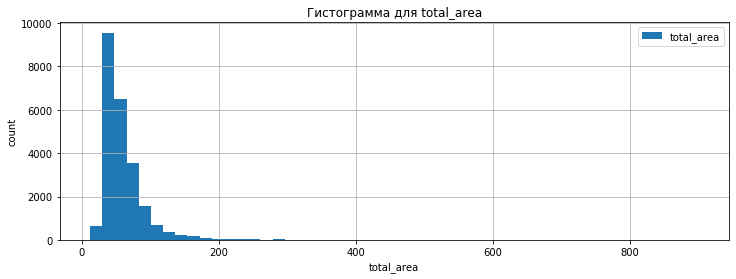

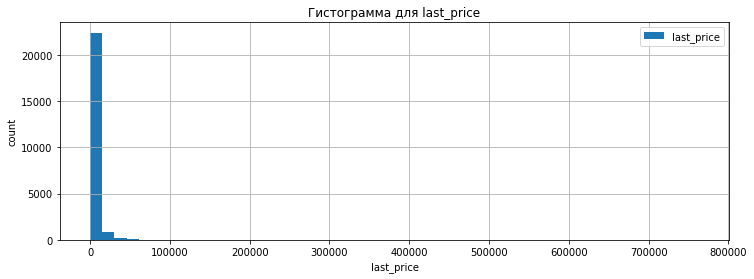

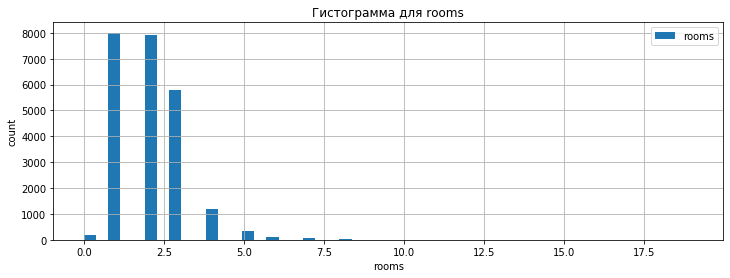

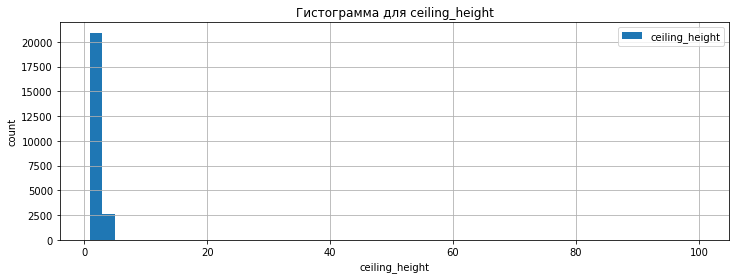

In [16]:
# создаём цикл для построения гистограмм

column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
 
for column in column_list:
    data.plot(y=column, kind='hist', bins=50, figsize=(12, 4), grid=True)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.title('Гистограмма для '+column)
    plt.show()
    
       

гистограмма для площади: больше всего встречаются объявлений с метражом 30-50 кв.м. Скорее всего, это однокомнатные квартиры или студии. 
Гистограмма похожа на распределенеи Пуассона с небольшими всплесками у значения 40 кв.м и 65 кв.м. 
По опыту и общим знаниям недвижимости в РФ эти всплески кажутся нормальными в связи с преобладающим количеством квартир с данными квадратурами. 
Форма распределения Пуассона зависит от числа событий. При небольших значениях распределение смещено влево, а с увеличением числа событий становится симметричным и уходит вправо
гистограмма для цены: на ней виден длинный хвост в правой части, что обусловлено дорогой недвижкой. Больше всего квартир отмечено в 4.000.000 рублях.
гистограмма для числа комнат: всё достаточно очевидно, на рынке преобладают однушки и двушки
гистограмма для высоты потолков: средний строительный стандрат потолков 2.7 метров отображён визуально на гистограмме, более половины квартир в объявлениях на продажу имеют такой размер

### Выбросы по конечной цене и общей площади

Проверка среднего значения, медианы, корреляции общей площади, просмотр диаграммы размаха

In [17]:
data['total_area'].mean()

60.3228241035434

In [18]:
data['total_area'].median()

52.0

In [19]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

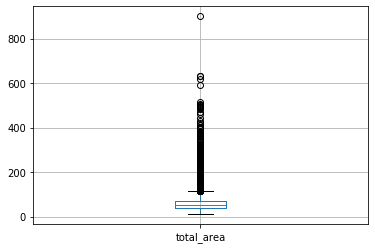

In [20]:
data.boxplot('total_area')
plt.show()

In [21]:
#поиск границ для отброса выбросов
q3=data['total_area'].quantile(.75)
q1=data['total_area'].quantile(.25)
iqr=(q3-q1)*1.5
qr_area = q3+iqr
qr_area

114.25

In [22]:
#срез таблицы без выбросов по общей площади
df = data.query('total_area < @qr_area')
df['total_area'].describe()

count    22326.000000
mean        54.319704
std         19.331030
min         12.000000
25%         39.400000
50%         50.000000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64

Проверка среднего значения, медианы, корреляции конечной цены, просмотр диаграммы размаха

In [23]:
df['last_price'].mean()

5301.145175445668

In [24]:
df['last_price'].median()

4500.0

In [25]:
df['last_price'].describe()

count    22326.000000
mean      5301.145175
std       3390.250004
min         12.190000
25%       3350.000000
50%       4500.000000
75%       6300.000000
max      82000.000000
Name: last_price, dtype: float64

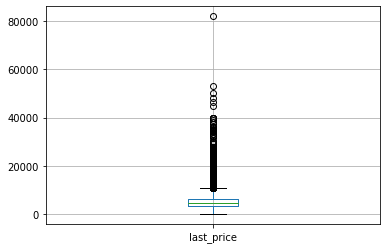

In [26]:
df.boxplot('last_price')
plt.show()

Определяем гарницы усов: 
(231-45)*1.5 = 279
нижний квартиль: 45-279 = -234 (граница совпадает с графиком)
верхний квартиль: 231+279= 510 (верхняя граница графика, все занчений выше нужно отсечь)


In [27]:
q3_last_price=data['last_price'].quantile(.75)
q1_last_price=data['last_price'].quantile(.25)
iqr_last_price=(q3_last_price-q1_last_price)*1.5
qr_last_price = q3_last_price+iqr_last_price
qr_last_price

11875.0

In [28]:
dataframe = df.query('last_price < @qr_last_price')
dataframe['last_price'].describe()

count    21338.000000
mean      4799.778064
std       2178.442330
min         12.190000
25%       3300.000000
50%       4400.000000
75%       5950.000000
max      11866.860000
Name: last_price, dtype: float64

После выброса нестандартных значений и приведения типичных случаев разница между средним значением и медианой уменьшилась. По этим данным можно построить гистограммы

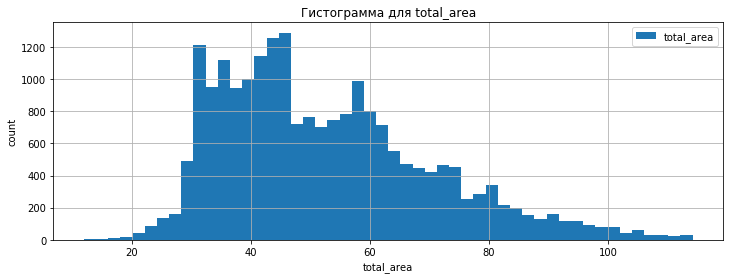

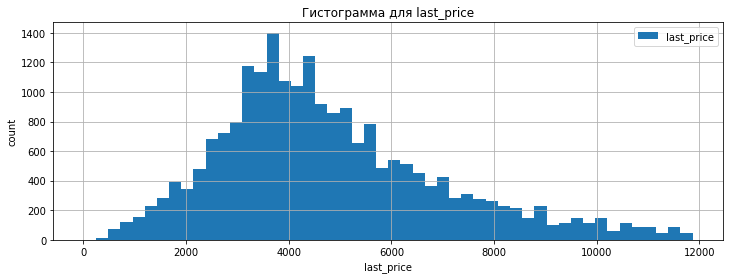

In [29]:
column_list = ['total_area', 'last_price']
 
for column in column_list:
    dataframe.plot(y=column, kind='hist', bins=50, figsize=(12, 4), grid=True)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.title('Гистограмма для '+column)
    plt.show()


По типичным данным делаем вывод, что преобладающее большинство квартир от 30 до 45 квадратных метров.
Приведя значения в столбце с конечной ценой к типичным данным, можно сказать что на рынке недвижимости можно гораздо чаще встретить квартиры стоимостью 4.000.000, нежели за 10.000.000

### Зависимости цены за метр от разных параметров

In [30]:
##// - целочисленное деление и вывод корреляции 
dataframe['area_10m'] = dataframe['total_area'] // 10 * 10 
dataframe['area_10m'].corr(dataframe['price_for_metr'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-0.08089462042940769

In [31]:
dataframe_room=dataframe.query('rooms<8')

dataframe_room['rooms'].corr(dataframe_room['price_for_metr'])

-0.23109841552293373

In [32]:
dataframe_room['center_km']=dataframe_room['cityCenters_nearest']/1000
dataframe_room_nan = dataframe_room.dropna(subset=['center_km'])
df_spb = dataframe_room_nan.query('locality_name == "Санкт-Петербург"')
df_spb

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,...,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total,area_10m,center_km
2,5196.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,8.3,...,558.0,92.79,3,8,2015,другой,0.612500,0.148214,50.0,13.933
4,10000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,41.0,...,121.0,100.00,1,6,2018,другой,0.320000,0.410000,100.0,8.098
7,7915.0,71.60,2019-04-18,2,2.65,24,40.681818,22,False,18.9,...,NaN,110.54,3,4,2019,другой,0.568182,0.263966,70.0,11.634
9,5400.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,6.5,...,289.0,88.52,6,2,2017,другой,0.714754,0.106557,60.0,15.008
10,5050.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,8.5,...,137.0,127.53,3,11,2017,другой,0.512626,0.214646,30.0,13.878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,9200.0,101.00,2019-04-01,3,3.05,15,63.000000,12,False,15.0,...,23.0,91.09,0,4,2019,другой,0.623762,0.148515,100.0,14.428
23689,3550.0,35.30,2018-02-28,1,2.86,15,16.300000,4,False,9.1,...,29.0,100.57,2,2,2018,другой,0.461756,0.257790,30.0,16.081
23690,5500.0,52.00,2018-07-19,2,2.65,5,31.000000,2,False,6.0,...,15.0,105.77,3,7,2018,другой,0.596154,0.115385,50.0,6.263
23691,9470.0,72.90,2016-10-13,2,2.75,25,40.300000,7,False,10.6,...,519.0,129.90,3,10,2016,другой,0.552812,0.145405,70.0,4.489


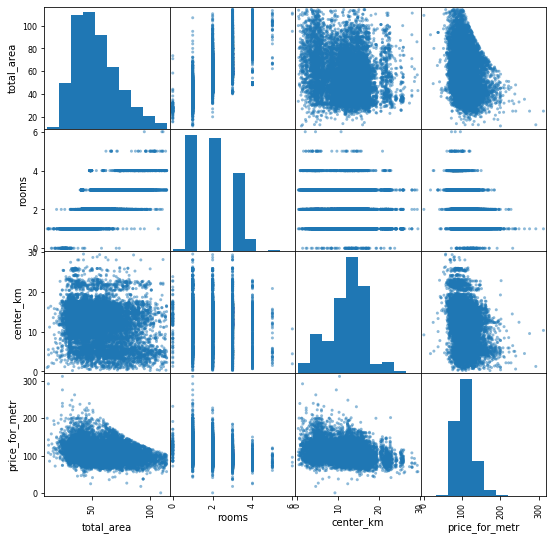

In [33]:
list_of_cols = ['total_area', 'rooms', 'center_km', 'price_for_metr']
pd.plotting.scatter_matrix(df_spb[list_of_cols], figsize=(9, 9))
plt.show()

Создание нового столбца с расстоянием до центра Питера в километрах. Выбросом пропусков для построения графика. Срез по Питеру. Потсроение сводной таблицы и графика по зависимости расстояния до центра Питера и цены за квадратный метр. На нём можно ожидаемо увидеть как удалённость от центра уменьшает стоимость квадрата в квартире. Необычное проседание цены за квадрат на 3.5 км. и необычный рост цены за квадрат после 25 км.

Трёшки выгоднее всего

In [34]:
#создание сводной таблицы зависимости по категориальным данным floor_affiliation
pivot_floor = df_spb.pivot_table(index ='floor_affiliation', values='price_for_metr', aggfunc=['median'])
pivot_floor

,median
,price_for_metr
floor_affiliation,
другой,104.000
первый,92.365
последний,98.470


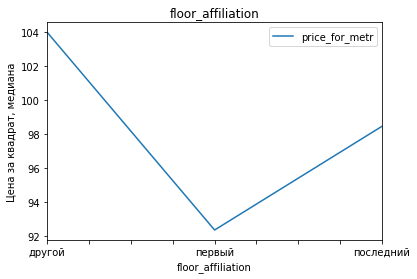

In [35]:
#построение графика по сводной таблице зависимости цены за квадрат и принадлежности этажа
pivot_floor.plot(y='median')
plt.ylabel('Цена за квадрат, медиана')
plt.title('floor_affiliation')
plt.show()

Из полученного графика ожно сделать вывод, что на первом этаже квартиры котируются меньше на рынке недвижимости.

In [36]:
#построение графика по сводной таблице зависимости цены за метр и дня недели 
pivot_weekday = df_spb.pivot_table(index='weekday', values='price_for_metr', aggfunc=['count', 'mean', 'median'])
pivot_weekday.columns = ['count', 'mean', 'median']
pivot_weekday

,count,mean,median
weekday,,,
0,2037,105.450957,102.110
1,2463,105.354507,101.980
2,2279,106.086678,102.140
3,2406,105.899813,102.530
4,2320,105.212767,101.565
5,1090,105.910266,101.655
6,951,106.448013,102.610


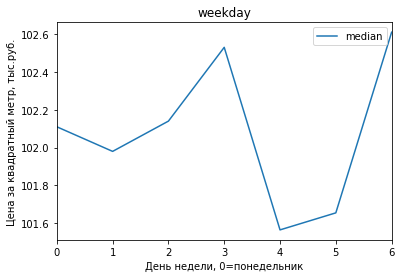

In [37]:
pivot_weekday.plot(y='median')
plt.xlabel('День недели, 0=понедельник')
plt.ylabel('Цена за квадратный метр, тыс.руб.')
plt.title('weekday')
plt.show()

Строим очевидности по графику: если судить по медиане, то в объявления, выкладываемые в воскресенье, ставят за квадратный метр выше, чем в остальные дни, а в пятницу самую низкую стоимость

In [38]:
pivot_month = df_spb.pivot_table(index='month', values='price_for_metr', aggfunc=['count', 'mean', 'median'])
pivot_month.columns = ['count', 'mean', 'median']
pivot_month

,count,mean,median
month,,,
1,785,107.131924,102.700
2,1506,105.672165,102.245
3,1457,107.024214,103.790
4,1409,107.355429,104.330
5,735,104.306463,100.000
6,986,103.780933,100.975
7,987,104.337812,101.110
8,1043,105.750853,102.940
9,1126,106.950240,103.075


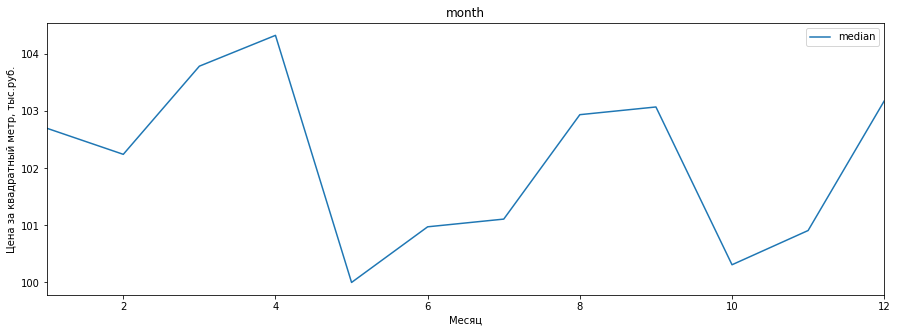

In [39]:
pivot_month.plot(y='median', figsize=(15, 5))
plt.xlabel('Месяц')
plt.ylabel('Цена за квадратный метр, тыс.руб.')
plt.title('month')
plt.show()

Опираясь на график: с наступлением весны идёт небольшой рост цены за квадрат, следом идёт понижение ближе к летнему июню. За лето снова наблюдается планомерный рост цены до августа 

In [40]:
pivot_year = df_spb.pivot_table(index='year', values='price_for_metr', aggfunc=['count', 'mean', 'median'])
pivot_year.columns = ['count', 'mean', 'median']
pivot_year

,count,mean,median
year,,,
2014,53,113.491509,106.340
2015,661,101.591467,97.610
2016,1560,101.741744,98.175
2017,4795,102.539520,99.440
2018,4749,107.721209,104.030
2019,1728,113.713519,110.470


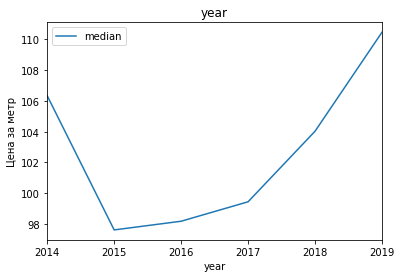

In [41]:
pivot_year.plot(y='median')
plt.xlabel('year')
plt.ylabel('Цена за метр')
plt.title('year')
plt.show()

Судя по статистике в 2015 году рынок недвижимости просел, предполагаю, это можно отнести к падению рубля в конце 2014. К 2016 также наблюдается опущение цен на недвижимость, но плавное, после этого падение сменяется на рост и снова плавномерно повышается цена за один квадратный метр.

## Выборка 10 населённых пунктов

In [42]:
top10 = dataframe_room_nan.groupby('locality_name').agg({'rooms':'count'}).sort_values(by='rooms', ascending=False)
top10.columns = ['count']
top10.head(10)

,count
locality_name,
Санкт-Петербург,13546
посёлок Шушары,436
Пушкин,336
Колпино,335
посёлок Парголово,326
Петергоф,195
Красное Село,174
Сестрорецк,163
Ломоносов,129


Группировка и вывод десяти населений с самым большим количеством объявлений о продаже квартиры. 

In [43]:
mean_max_min_price = dataframe_room_nan.groupby('locality_name').agg({'rooms':'count', 'price_for_metr':'mean', 'last_price':['max','min']})
mean_max_min_price.sort_values(by=('rooms', 'count'), ascending=False).head(10)


rooms price_for_metr last_price         
                   count           mean        max      min
locality_name                                              
Санкт-Петербург    13546     105.686262   11866.86    12.19
посёлок Шушары       436      78.578326   10990.00  1500.00
Пушкин               336     100.462083   11350.00  1990.00
Колпино              335      75.221761    8600.00  2100.00
посёлок Парголово    326      90.332515    9140.00  1400.00
Петергоф             195      83.461538   11100.00  2100.00
Красное Село         174      72.296897    8500.00  1799.00
Сестрорецк           163     101.262209   11500.00  2800.00
Ломоносов            129      73.312713    9150.00  1650.00
Кронштадт             94      79.666915   11500.00  2290.00

In [44]:
data.loc[data['last_price']<13]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total
8793,12.19,109.0,2019-03-20,2,2.75,25,32.0,25,False,40.5,Санкт-Петербург,9176.0,8.0,0.11,2,3,2019,последний,0.293578,0.37156


In [45]:
data.loc[data['last_price']==763000]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total
12971,763000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,68.939075,Санкт-Петербург,3956.0,33.0,1907.5,5,9,2017,последний,0.625,0.172348


Санкт-Петербург имеет самую низкую стоимость квартиры в выборке: 1.219.000 за 109 метров двухкомнатной квартиры на последнем этаже за пределами центра. Может быть, в квартире есть скрытые скрытые от статистики факторы, сильно занижающие стоимость. Но вероятно могла произойти ошибка в вводе стоимости квартиры.
Точно также в Питер имеет самую высокую стоимость квартиры в выборке: 763.000.000 за 400 квадратных метров в семикомнатной квартире на последнем этаже в 4 км от центра Питера. 

## Определение центра Питера

In [46]:
data['center_km'] = data['cityCenters_nearest']/1000
data

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,...,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total,center_km
0,13000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,25.000000,...,16028.0,NaN,120.37,3,3,2019,другой,0.472222,0.231481,16.028
1,3350.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,11.000000,...,18603.0,81.0,82.92,1,12,2018,первый,0.460396,0.272277,18.603
2,5196.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,8.300000,...,13933.0,558.0,92.79,3,8,2015,другой,0.612500,0.148214,13.933
3,64900.0,159.00,2015-07-24,3,2.65,14,90.340909,9,False,27.403282,...,6800.0,424.0,408.18,4,7,2015,другой,0.568182,0.172348,6.800
4,10000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,41.000000,...,8098.0,121.0,100.00,1,6,2018,другой,0.320000,0.410000,8.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,13.830000,...,4232.0,NaN,72.49,1,3,2017,другой,0.547792,0.103356,4.232
23695,3100.0,59.00,2018-01-15,3,2.65,5,38.000000,4,False,8.500000,...,NaN,45.0,52.54,0,1,2018,другой,0.644068,0.144068,NaN
23696,2500.0,56.70,2018-02-11,2,2.65,3,29.700000,1,False,9.772114,...,NaN,NaN,44.09,6,2,2018,первый,0.523810,0.172348,NaN
23697,11475.0,76.75,2017-03-28,2,3.00,17,43.607955,12,False,23.300000,...,10364.0,602.0,149.51,1,3,2017,другой,0.568182,0.303583,10.364


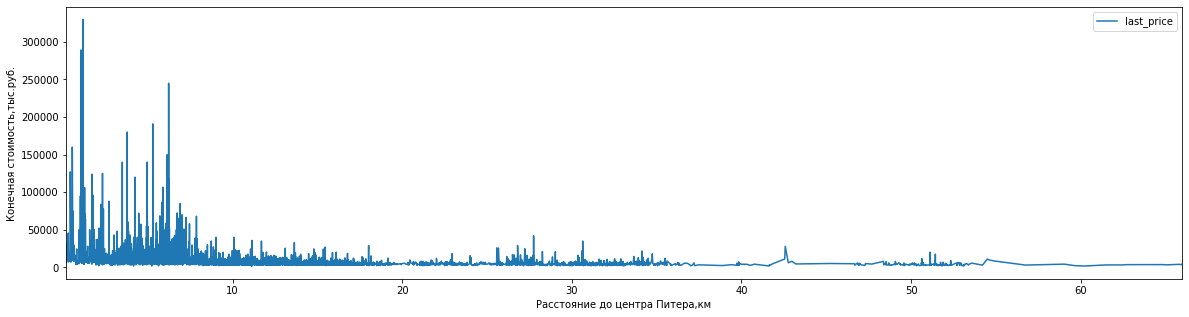

In [47]:
data.pivot_table(index='center_km', values='last_price', aggfunc='median').plot(figsize=(20,5))
plt.xlabel('Расстояние до центра Питера,км')
plt.ylabel('Конечная стоимость,тыс.руб.');

Так выглядит график с расстоянием до центра без округления

In [48]:
data['center_km']=data['center_km'].round(0)
data

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,...,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total,center_km
0,13000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,25.000000,...,16028.0,NaN,120.37,3,3,2019,другой,0.472222,0.231481,16.0
1,3350.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,11.000000,...,18603.0,81.0,82.92,1,12,2018,первый,0.460396,0.272277,19.0
2,5196.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,8.300000,...,13933.0,558.0,92.79,3,8,2015,другой,0.612500,0.148214,14.0
3,64900.0,159.00,2015-07-24,3,2.65,14,90.340909,9,False,27.403282,...,6800.0,424.0,408.18,4,7,2015,другой,0.568182,0.172348,7.0
4,10000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,41.000000,...,8098.0,121.0,100.00,1,6,2018,другой,0.320000,0.410000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,13.830000,...,4232.0,NaN,72.49,1,3,2017,другой,0.547792,0.103356,4.0
23695,3100.0,59.00,2018-01-15,3,2.65,5,38.000000,4,False,8.500000,...,NaN,45.0,52.54,0,1,2018,другой,0.644068,0.144068,NaN
23696,2500.0,56.70,2018-02-11,2,2.65,3,29.700000,1,False,9.772114,...,NaN,NaN,44.09,6,2,2018,первый,0.523810,0.172348,NaN
23697,11475.0,76.75,2017-03-28,2,3.00,17,43.607955,12,False,23.300000,...,10364.0,602.0,149.51,1,3,2017,другой,0.568182,0.303583,10.0


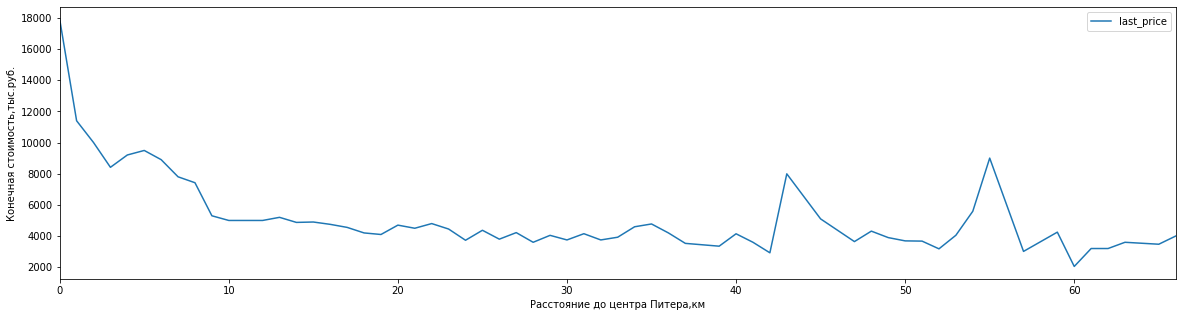

In [49]:
data.pivot_table(index='center_km', values='last_price', aggfunc='median').plot(figsize=(20,5))
plt.xlabel('Расстояние до центра Питера,км')
plt.ylabel('Конечная стоимость,тыс.руб.');

Так выглдит график с округлением километража до целых чисел

Лично для меня нагляднее график без округления, там хорошо видна отметка примернов 8 км.
Ответ: центральная зона = 8км

In [50]:
spb_center = data.query('center_km<8')
spb_center

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,...,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total,center_km
3,64900.0,159.00,2015-07-24,3,2.65,14,90.340909,9,False,27.403282,...,6800.0,424.0,408.18,4,7,2015,другой,0.568182,0.172348,7.0
24,6500.0,97.20,2015-10-31,2,2.65,3,46.500000,1,False,19.600000,...,2336.0,265.0,66.87,5,10,2015,первый,0.478395,0.201646,2.0
35,15500.0,149.00,2017-06-26,5,2.65,5,104.000000,4,False,17.000000,...,3502.0,644.0,104.03,0,6,2017,другой,0.697987,0.114094,4.0
51,45000.0,161.00,2017-10-17,3,3.20,8,38.000000,4,False,50.000000,...,6589.0,541.0,279.50,1,10,2017,другой,0.236025,0.310559,7.0
52,11795.0,136.00,2017-09-22,6,3.00,2,94.000000,2,False,11.000000,...,6582.0,NaN,86.73,4,9,2017,последний,0.691176,0.080882,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,4250.0,47.00,2016-05-20,1,2.65,6,18.200000,1,False,14.600000,...,4946.0,131.0,90.43,4,5,2016,первый,0.387234,0.310638,5.0
23681,5250.0,43.00,2018-05-11,2,2.50,5,29.000000,2,False,6.000000,...,7262.0,80.0,122.09,4,5,2018,другой,0.674419,0.139535,7.0
23690,5500.0,52.00,2018-07-19,2,2.65,5,31.000000,2,False,6.000000,...,6263.0,15.0,105.77,3,7,2018,другой,0.596154,0.115385,6.0
23691,9470.0,72.90,2016-10-13,2,2.75,25,40.300000,7,False,10.600000,...,4489.0,519.0,129.90,3,10,2016,другой,0.552812,0.145405,4.0


Выборка объявлений о продаже квартир в радиусе 8км от центра Питера.

## Анализ по сегментации центровых квартир в Питере

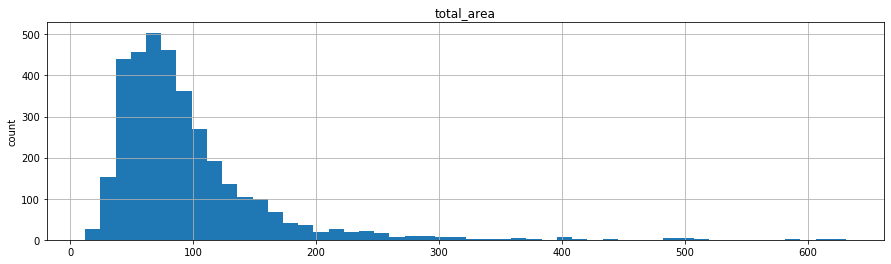

In [51]:
spb_center.hist('total_area', bins=50, figsize=(15, 4))
plt.ylabel('count')
plt.title('total_area')
plt.show()

Стандартный типовой метраж составляет от 30 до 100 квадратных метров.

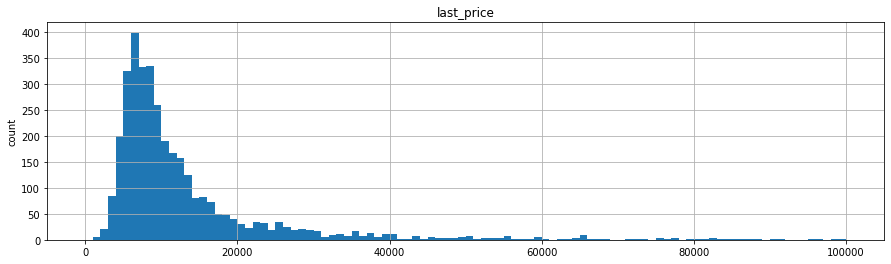

In [52]:
spb_center.hist('last_price', bins=100, range=(0, 100000), figsize=(15, 4))
plt.ylabel('count')
plt.title('last_price')
plt.show()

на рынке Питера преобладающее большинство недвижимости с вилкой цен от 3.000.000 до 10.000.000 

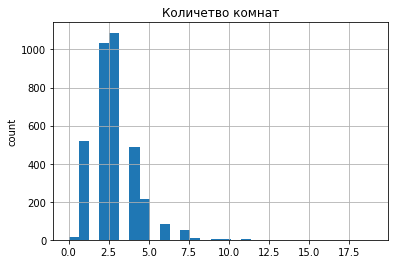

In [53]:
spb_center.hist('rooms', bins=30)
plt.ylabel('count')
plt.title('Количетво комнат')
plt.show()

В Питере типовые квартиры являются двухкомнатными и трёхкомнатными

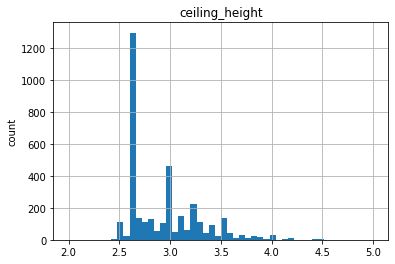

In [54]:
spb_center.hist('ceiling_height', bins=50, range=(2, 5))
plt.ylabel('count')
plt.title('ceiling_height')
plt.show()

Как и предполагалось, стандартизированный строительный размер потолков преобладает выборке
стандартизированный размер потолков в 3 метров, присущий сталинским временам и оставшийся в небольшом количестве, рассматриваемый в каком-то роде как роскошь, также распространён в Питере
имеются небольшое количество нестандартных потолков, таких как 2.5 (бедные люди) и 4 метра (скорее всего элитная недвижимость)

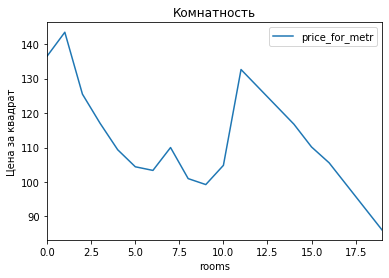

In [55]:
spb_center.pivot_table(index='rooms', values='price_for_metr', aggfunc='median').plot()
plt.ylabel('Цена за квадрат')
plt.title('Комнатность')
plt.show()

однокомнатные квартиры пользуются спросом и от этого стоят дороже, чем пятикомнатные квартиры, которые довольно трудно продать из-за большого метража

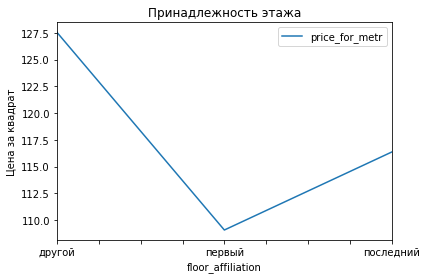

In [56]:
spb_center.pivot_table(index='floor_affiliation', values='price_for_metr', aggfunc='median').plot()
plt.ylabel('Цена за квадрат')
plt.title('Принадлежность этажа')
plt.show()

на первом этаже квартиры не котируются престижностью
опасно, ворам залезть легче, придётся в окно смотреть через решётки на этот мир, чаще на первых этажа нет балконов и вид в окнах не такой живописный как на последнем


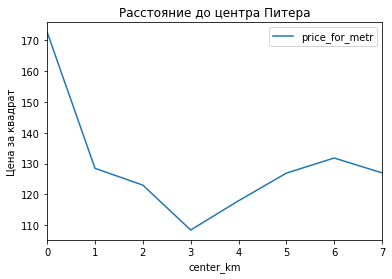

In [57]:
spb_center.pivot_table(index='center_km', values='price_for_metr', aggfunc='median').plot()
plt.ylabel('Цена за квадрат')
plt.title('Расстояние до центра Питера')
plt.show()

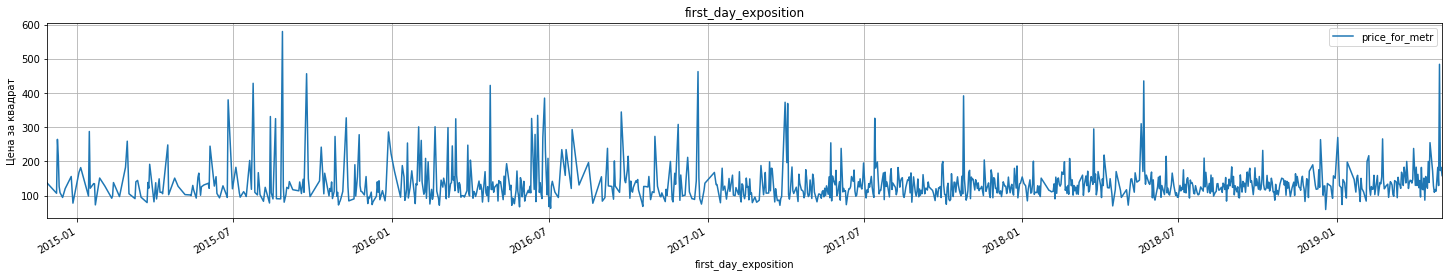

In [58]:
spb_center.pivot_table(index='first_day_exposition', values='price_for_metr', aggfunc='median').plot(grid=True, figsize=(25, 4))
plt.ylabel('Цена за квадрат')
plt.title('first_day_exposition')
plt.show()

неординарный скачок цен за квадратный метр в апреле 2018. 


In [59]:
april = spb_center.query('month==4 and year==2018')
april

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,...,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total,center_km
817,19800.000,99.20,2018-04-06,3,3.15,16,40.500000,15,False,31.200000,...,5961.0,102.0,199.60,4,4,2018,другой,0.408266,0.314516,6.0
955,11100.000,95.00,2018-04-20,3,2.65,10,53.000000,6,False,13.000000,...,4087.0,90.0,116.84,4,4,2018,другой,0.557895,0.136842,4.0
1436,330000.000,190.00,2018-04-04,3,3.50,7,95.000000,5,False,40.000000,...,1197.0,233.0,1736.84,2,4,2018,другой,0.500000,0.210526,1.0
1503,5700.000,62.00,2018-04-10,2,2.50,5,38.000000,5,False,9.000000,...,5854.0,317.0,91.94,1,4,2018,последний,0.612903,0.145161,6.0
2347,8721.680,58.30,2018-04-13,1,2.70,9,21.200000,7,False,11.200000,...,5552.0,268.0,149.60,4,4,2018,другой,0.363636,0.192110,6.0
2994,5300.000,53.30,2018-04-05,2,3.00,5,34.000000,1,False,8.000000,...,6793.0,257.0,99.44,3,4,2018,первый,0.637899,0.150094,7.0
3110,22100.000,90.50,2018-04-20,3,3.20,6,61.000000,4,False,12.900000,...,2012.0,24.0,244.20,4,4,2018,другой,0.674033,0.142541,2.0
3294,8500.000,80.30,2018-04-15,3,3.00,5,57.900000,4,False,8.100000,...,6107.0,313.0,105.85,6,4,2018,другой,0.721046,0.100872,6.0
3410,10900.000,75.00,2018-04-20,3,2.75,16,42.613636,9,False,12.926077,...,7055.0,90.0,145.33,4,4,2018,другой,0.568182,0.172348,7.0
3441,6350.000,79.20,2018-04-02,3,2.90,5,55.700000,4,False,8.400000,...,5594.0,149.0,80.18,0,4,2018,другой,0.703283,0.106061,6.0


После просмотра апреля 2018 года, была обнаружена одна едиснтвенная квартира, очень сильно выбивающаяся из статистики, имеющая примерно в 10 раз выше цену за квадратный метр, нежели средняя цена за квадрат. 
330 миллионов за 190 квадратов с тремя комнатами и потолками 3.50. Либо риэлтор новичок, либо хозяин квартиры чересчур высокого мнения о предложении, а может быть ошибка в данных. Её можно удалить.

In [60]:
spb_center = spb_center.drop(index = [1436])

In [61]:
april = spb_center.query('month==4 and year==2018')
april

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,...,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total,center_km
817,19800.000,99.20,2018-04-06,3,3.15,16,40.500000,15,False,31.200000,...,5961.0,102.0,199.60,4,4,2018,другой,0.408266,0.314516,6.0
955,11100.000,95.00,2018-04-20,3,2.65,10,53.000000,6,False,13.000000,...,4087.0,90.0,116.84,4,4,2018,другой,0.557895,0.136842,4.0
1503,5700.000,62.00,2018-04-10,2,2.50,5,38.000000,5,False,9.000000,...,5854.0,317.0,91.94,1,4,2018,последний,0.612903,0.145161,6.0
2347,8721.680,58.30,2018-04-13,1,2.70,9,21.200000,7,False,11.200000,...,5552.0,268.0,149.60,4,4,2018,другой,0.363636,0.192110,6.0
2994,5300.000,53.30,2018-04-05,2,3.00,5,34.000000,1,False,8.000000,...,6793.0,257.0,99.44,3,4,2018,первый,0.637899,0.150094,7.0
3110,22100.000,90.50,2018-04-20,3,3.20,6,61.000000,4,False,12.900000,...,2012.0,24.0,244.20,4,4,2018,другой,0.674033,0.142541,2.0
3294,8500.000,80.30,2018-04-15,3,3.00,5,57.900000,4,False,8.100000,...,6107.0,313.0,105.85,6,4,2018,другой,0.721046,0.100872,6.0
3410,10900.000,75.00,2018-04-20,3,2.75,16,42.613636,9,False,12.926077,...,7055.0,90.0,145.33,4,4,2018,другой,0.568182,0.172348,7.0
3441,6350.000,79.20,2018-04-02,3,2.90,5,55.700000,4,False,8.400000,...,5594.0,149.0,80.18,0,4,2018,другой,0.703283,0.106061,6.0
4865,4800.000,56.00,2018-04-01,3,2.65,6,38.000000,4,False,8.000000,...,5142.0,32.0,85.71,6,4,2018,другой,0.678571,0.142857,5.0


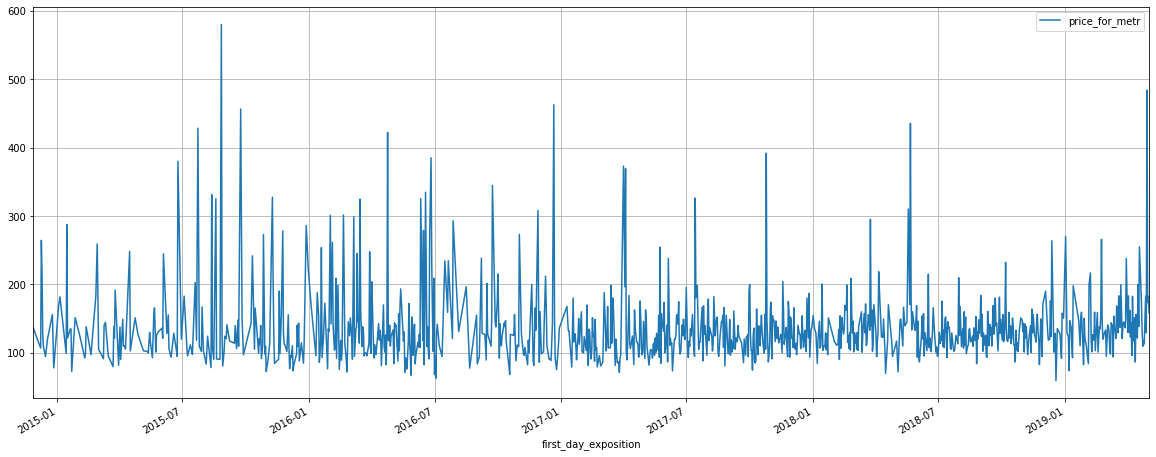

In [65]:
spb_center.pivot_table(index='first_day_exposition', values='price_for_metr', aggfunc='median').plot(grid=True, figsize=(20, 8))
plt.show()

In [63]:
summer2015=spb_center.query('month == 7 and year == 2015')
summer2015.sort_values(by='price_for_metr', ascending=False)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,...,cityCenters_nearest,days_exposition,price_for_metr,weekday,month,year,floor_affiliation,coef_living_to_total,coef_kitchen_to_total,center_km
12674,140000.000,241.0,2015-07-24,5,3.00,5,136.931818,4,False,41.535793,...,3503.0,399.0,580.91,4,7,2015,другой,0.568182,0.172348,4.0
2243,130278.280,304.0,2015-07-24,5,3.11,9,172.727273,7,False,52.393697,...,5913.0,599.0,428.55,4,7,2015,другой,0.568182,0.172348,6.0
3,64900.000,159.0,2015-07-24,3,2.65,14,90.340909,9,False,27.403282,...,6800.0,424.0,408.18,4,7,2015,другой,0.568182,0.172348,7.0
16034,12900.000,60.2,2015-07-30,2,3.60,5,10.500000,3,False,30.000000,...,4213.0,529.0,214.29,3,7,2015,другой,0.174419,0.498339,4.0
16169,25000.000,123.2,2015-07-20,2,2.65,6,85.000000,2,False,12.300000,...,5746.0,1375.0,202.92,0,7,2015,другой,0.689935,0.099838,6.0
11315,25835.000,141.2,2015-07-04,4,2.65,10,93.100000,3,False,17.000000,...,5457.0,378.0,182.97,5,7,2015,другой,0.659348,0.120397,5.0
10891,12922.000,87.0,2015-07-16,2,2.65,9,44.000000,7,False,14.994249,...,6031.0,348.0,148.53,3,7,2015,другой,0.505747,0.172348,6.0
20327,8137.395,55.3,2015-07-22,1,2.65,9,21.530000,2,False,21.530000,...,6442.0,788.0,147.15,2,7,2015,другой,0.389331,0.389331,6.0
3800,6900.000,47.6,2015-07-22,2,2.65,5,28.200000,5,False,8.200000,...,472.0,398.0,144.96,2,7,2015,последний,0.592437,0.172269,0.0
18283,9900.000,78.0,2015-07-09,3,2.65,5,43.300000,1,False,10.100000,...,5068.0,464.0,126.92,3,7,2015,первый,0.555128,0.129487,5.0


### Шаг 5. Общий вывод

В данном исследовании меньше времени было потрачено на предобработку и больше на анализ.
Из полученных сведений можно построить такую картину:
для рынка недвижимости в Питере было непростое время после 2014 года и роста доллара, ему присущи и типичны такие факторы как стандартизированный строительный размер потолка 2.6 метра, вилка ценника от 3 до 10 миллионов, многокомнатность
сильно влияют на ценник:
1. удалённость от центра 
2. этажность 
3. комнатность
4. потолки
5. площадь кухни и жилой зоны

Также важными факторами, влияющими на решения людей являются год постройки дома, тип постройки(панель, кирпич и т.д.), удалённость от метрополитена. Изучение этих данных добавит более широкое понимание рынка.